In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating our dataset 

In [5]:
mean=[4,2]
cov=[[1,-0.5],
     [-0.5,1]
]
dataset=np.random.multivariate_normal(mean,cov,500)
print(dataset.shape)
#plt.plot(dataset)
#plt.show()

(500, 2)


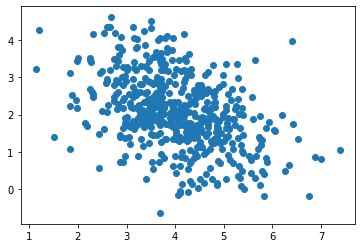

In [6]:
plt.figure()
plt.scatter(dataset[:,0],dataset[:,1])
plt.show()

In [7]:
mean_01 = [4,2]
cov_01 = [[1,  0.5],
         [0.5, 1]]
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)

mean_02 = [1,3]
cov_02 = [[1.3,  -0.3],
         [-0.3, 1.5]]
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


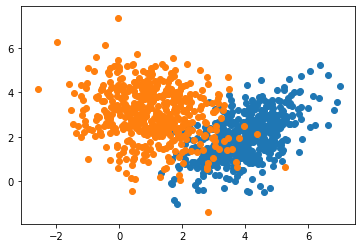

In [8]:
plt.figure()
plt.scatter(dist_01[:,0],dist_01[:,1])
plt.scatter(dist_02[:,0],dist_02[:,1])
plt.show()

In [10]:
rows=dist_01.shape[0]+dist_02.shape[0]
columns=dist_01.shape[1]+1 # extra columns for labels

dataset=np.zeros((rows,columns))
dataset.shape

(1000, 3)

In [12]:
dataset[:dist_01.shape[0],:-1]=dist_01
dataset[dist_01.shape[0]:,:-1]=dist_02

#Assigning labels
dataset[:dist_01.shape[0],-1]=0
dataset[dist_01.shape[0]:,-1]=1

In [13]:
dataset[490:510]

array([[ 3.53807198,  0.97029853,  0.        ],
       [ 4.94951141,  2.56614161,  0.        ],
       [ 3.25726181,  0.85654959,  0.        ],
       [ 2.82287483,  1.36035834,  0.        ],
       [ 4.35860163,  2.48726372,  0.        ],
       [ 4.86517658,  3.1100278 ,  0.        ],
       [ 5.41023099,  3.4258281 ,  0.        ],
       [ 3.43448904,  3.0578231 ,  0.        ],
       [ 3.75220348,  1.4154239 ,  0.        ],
       [ 4.29527156,  1.79109362,  0.        ],
       [ 0.85174988,  2.94428868,  1.        ],
       [ 1.54902575,  4.46385442,  1.        ],
       [ 1.97177721,  3.55342556,  1.        ],
       [-0.65222898,  2.90185492,  1.        ],
       [ 0.67600487,  2.81156523,  1.        ],
       [-0.08591828,  1.60793123,  1.        ],
       [ 2.11038081,  3.2015931 ,  1.        ],
       [ 0.71177443,  3.07913571,  1.        ],
       [ 1.2067225 ,  4.34431721,  1.        ],
       [ 0.79844716,  3.1197085 ,  1.        ]])

In [14]:
np.random.shuffle(dataset)

In [15]:
dataset[490:510]

array([[ 0.77600863,  1.23015752,  1.        ],
       [-0.22750842,  2.55640218,  1.        ],
       [ 2.39065608,  3.92824358,  1.        ],
       [ 4.29527156,  1.79109362,  0.        ],
       [ 1.6119436 ,  4.64850775,  1.        ],
       [ 4.83802181,  1.46325771,  0.        ],
       [ 3.28124895,  3.16467078,  0.        ],
       [ 4.06292523,  3.03977741,  0.        ],
       [ 0.61218599,  3.45404958,  1.        ],
       [ 3.68308426,  1.8393878 ,  0.        ],
       [ 0.01652204,  2.98532916,  1.        ],
       [ 0.48756505,  3.8884546 ,  1.        ],
       [ 5.1829883 ,  0.90637382,  0.        ],
       [ 4.70689348,  1.62628476,  0.        ],
       [ 1.02373487,  3.56069045,  1.        ],
       [ 3.77706172,  2.19434765,  0.        ],
       [ 1.88027819,  4.46336438,  1.        ],
       [ 2.06349135,  2.17473883,  0.        ],
       [-0.16067666,  5.20036768,  1.        ],
       [ 2.18378166,  2.17367649,  1.        ]])

#### Splitting into training and testing datasets

In [17]:
split = int(0.8*dataset.shape[0])

x_train=dataset[:split,:-1]
x_test=dataset[split:,:-1]

y_train=dataset[:split,-1]
y_test=dataset[split:,-1]

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(800, 2) (200, 2) (800,) (200,)


# K Nearest Neighbors

#### KNN problem statement

In [18]:
tp=np.array([1.5,4.2])

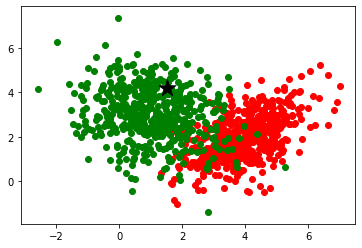

In [20]:
plt.figure()
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.scatter(tp[0],tp[1],marker='*',color='black',s=300)

# Implementing kNN

In [21]:
def euclidean(a1, a2):
    return np.sqrt(np.sum((a1 - a2) ** 2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [22]:
x_train[0],y_train[0]

(array([3.73733294, 1.46447253]), 0.0)

In [26]:
#1.compute distances
#2.sort
#3.choose k nearest neighbours
#4.decide (majority voting)

def knn(x_train,y_train,test_point,k=5): #it is noticed to get good accuracy at k=5
    
    distances=[]
    
    #1
    for data_point,label in zip(x_train,y_train):
        distance = euclidean(test_point,data_point)
        distances.append((distance,label))
    
    #2
    distances = sorted(distances,key=lambda x:x[0])
    
    #3
    k_nearest_neighbours=np.array(distances[:k])
    freq = np.unique(k_nearest_neighbours[:,1],return_counts=True)
    labels,counts =freq
    
    #4
    verdict = labels[counts.argmax()]
    return verdict

In [28]:
knn(x_train,y_train,tp)

1.0

In [29]:
def predictions(x_train,y_train,x_test,k=5):
    
    predictions= []
    
    for test_point in x_test:
        pred=knn(x_train,y_train,test_point,k)
        predictions.append(pred)
    return predictions

In [31]:
def cal_accuracy(predictions,y_test):
    return (predictions==y_test).sum()/y_test.shape[0]

In [32]:
p=predictions(x_train,y_train,x_test)
cal_accuracy(p,y_test)

0.955

# KNN on MNIST

In [40]:
import pandas as pd
dataset = pd.read_csv("DataSets\mnist\mnist_train.csv")

In [41]:
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dataset.shape

(60000, 785)

In [51]:
data=dataset.values[:5000]
data.shape

(5000, 785)

In [60]:
x,y = data[:,1:],data[:,0]
print(x[0].shape)
#print(28*28)

(784,)


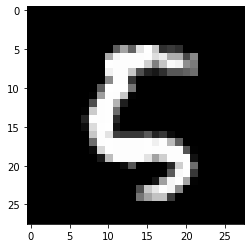

In [61]:
im = x[2000].reshape((28,28))
plt.figure()
plt.imshow(im,cmap='gray')

In [62]:
split = int(x.shape[0]*0.8)
x_train,x_test,y_train,y_test=x[:split],x[split:],y[:split],y[split:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4000, 784) (4000,)
(1000, 784) (1000,)


In [65]:
p=predictions(x_train,y_train,x_test)
cal_accuracy(p,y_test)

0.923

In [67]:
test_df= pd.read_csv("DataSets/mnist/mnist_test.csv")
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
test_data = test_df.values
test_data = test_data[:10]
test_data = test_data[:,1:]
test_data.shape

(10, 784)

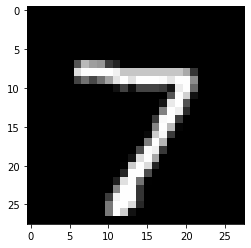

label:  7.0


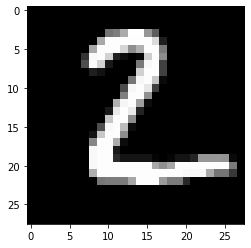

label:  2.0


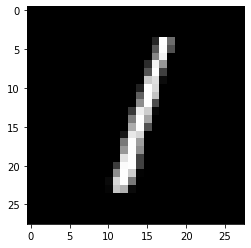

label:  1.0


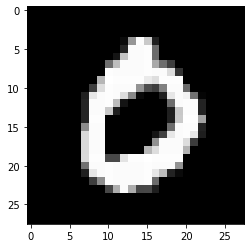

label:  0.0


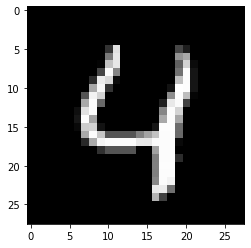

label:  9.0


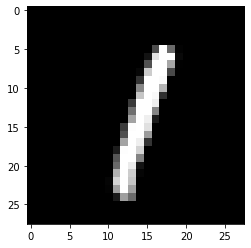

label:  1.0


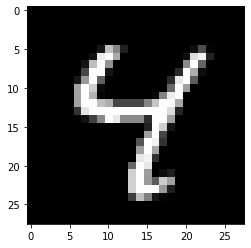

label:  4.0


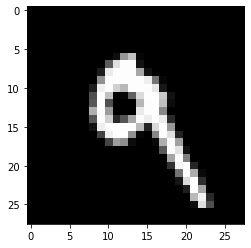

label:  9.0


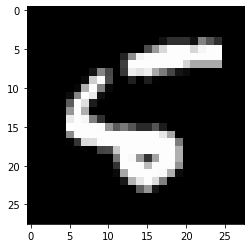

label:  4.0


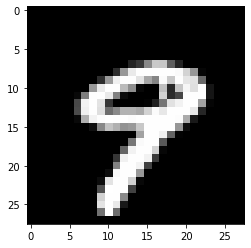

label:  9.0


In [71]:
for test in test_data:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im , cmap='gray')
    plt.show()
    print("label: ",knn(x_train,y_train,test))

# SKLearn KNN 

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_sk = KNeighborsClassifier(n_neighbors=5) #p=1 manhatton p=2 eucilidian
knn_sk.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
knn_sk.score(x_test,y_test)

0.923